In [10]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [11]:
# base configs and dictonary defination
baseurl = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS"

types_CGTIF = {
     "annual": { "name": "VHRAC", "dt": "Time"},
     "daily": { "name": "VHRDC", "dt": "Time"},
     "monthly": { "name": "VHRMC", "dt": "Month"},
     "season": { "name": "VHRSC", "dt": "Season"}
}

In [12]:
import ipywidgets as widgets
from IPython.display import display

type = types_CGTIF['annual']
    
w = widgets.Dropdown(
    options=['annual','daily','monthly','season'],
    value='annual',
    description='Type:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global type
        type = types_CGTIF[str(change['new'])]
        
w.observe(on_change)

display(w)

#data = "data according to type name and its data type (dt)" #maybe put a validation
def func(type): 
    global data
    data_type = type['name']
    if(data_type == 'VHRAC'):
        data = int(input('Please enter the Day between 1 - 365: '))
    elif(data_type == 'VHRDC'):
        data = int(input('Please enter the Hour between 0 - 23: '))
    elif(data_type == 'VHRMC'):
        data = int(input('Please enter the Month between 1 - 12: '))
    elif(data_type == 'VHRSC'):
        data = int(input('Please enter the Season between 1 - 4: '))          


Dropdown(description='Type:', options=('annual', 'daily', 'monthly', 'season'), value='annual')

Please enter the Month between 1 - 12: 2
https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRMC_LIS_FRD_cogs/VHRMC_LIS_FRD_Month_2.0_co.tif


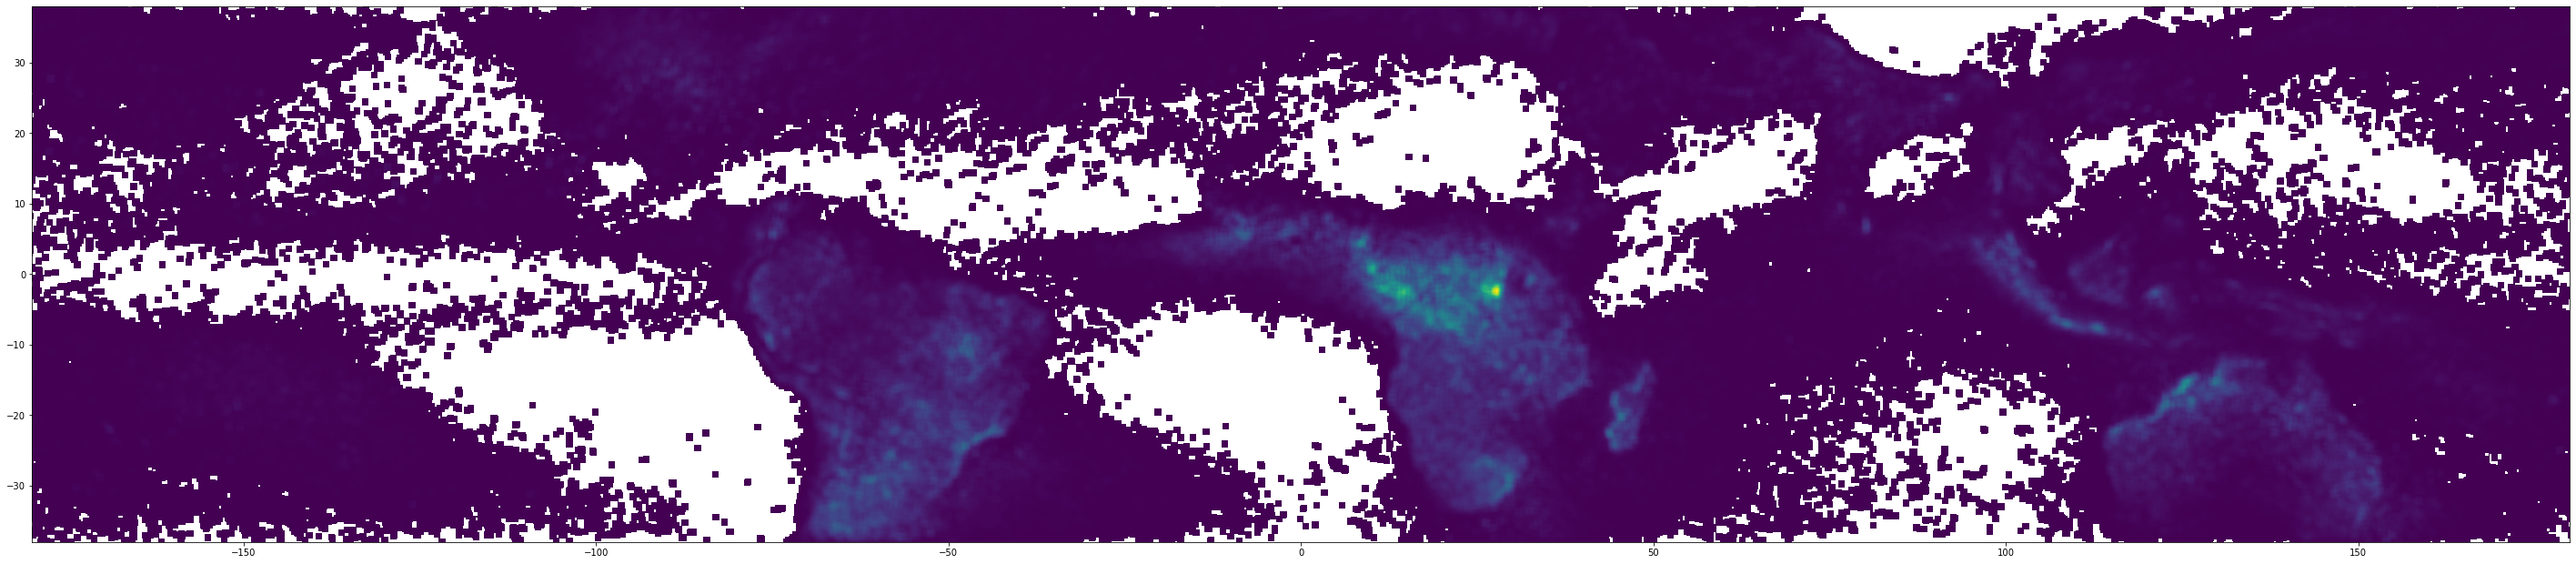

<AxesSubplot:>

In [13]:
func(type)
URL = f'{baseurl}/{type["name"]}_LIS_FRD_cogs/{type["name"]}_LIS_FRD_{type["dt"]}_{data}.0_co.tif'
print(URL)
dataset = rasterio.open(URL)
pyplot.figure(figsize=(50, 25))
# pyplot.imshow(dataset.read(1), cmap='gray')
# pyplot.show(dataset)
show(dataset)
# show(dataset.read(), transform=dataset.transform)

In [9]:
print(dataset.count)
print(f'{dataset.width} x  {dataset.height}')
print(dataset.crs)

1
3600 x  760
EPSG:4326
